# Projet MACHINE LEARNING
# realisé par bennour mohamed aymen 
# description de la base des données : 
 il s'agit d'une dataset d'une clientelle d'une banque qui présente 16 variables dont la variable d'interet deposit qui designe s'il le client a un depot ou non , et les variables explicatives sont l'age , le metier , avoir une maison ou pas , poutcome , previous etc ; dont on a 11161 observations 
 
 
# variable d'interet  : deposit 
# sommaire :  
  ## 1. stat descriptive 
  ## 2. cleaning data et preprocessing 
  ## 3. regression logistique 
  ## 4. arbre de decision
  ## 5. random forest 
  ## 6. comparaison des models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
%matplotlib inline
# Configure libraries
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

C:\Users\MSI\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load dataset
df_bank = pd.read_csv('bank.csv')

# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()
df_bank.tail()

Shape of dataframe: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,1,-1,0,unknown,no


In [3]:
df_bank['deposit'] = df_bank['deposit'].replace({'yes': 1, 'no': 0})
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,2,-1,0,unknown,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1,-1,0,unknown,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1,-1,0,unknown,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,1,-1,0,unknown,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,3,-1,0,unknown,1


In [4]:
df_bank['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

## Missing Values

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [5]:
df_bank.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

From the result we can be assured that our data have no missing value and are good to go

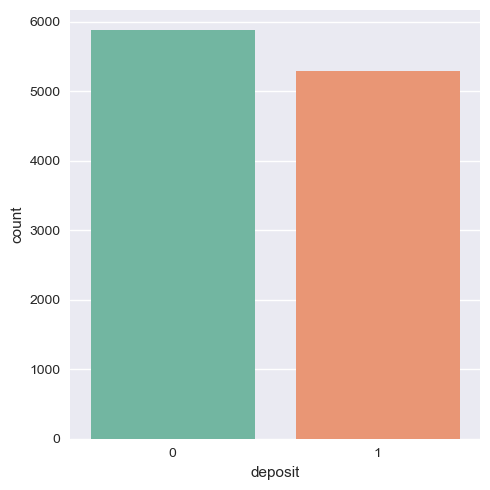

In [6]:
# Visualisation du résultat
df_temp = df_bank.copy()
sns.catplot(x="deposit", kind="count", data=df_temp, palette="Set2")
plt.show()

In [7]:
num_classes = len(df_bank['deposit'].unique())
print("Number of classes: ", num_classes)


Number of classes:  2


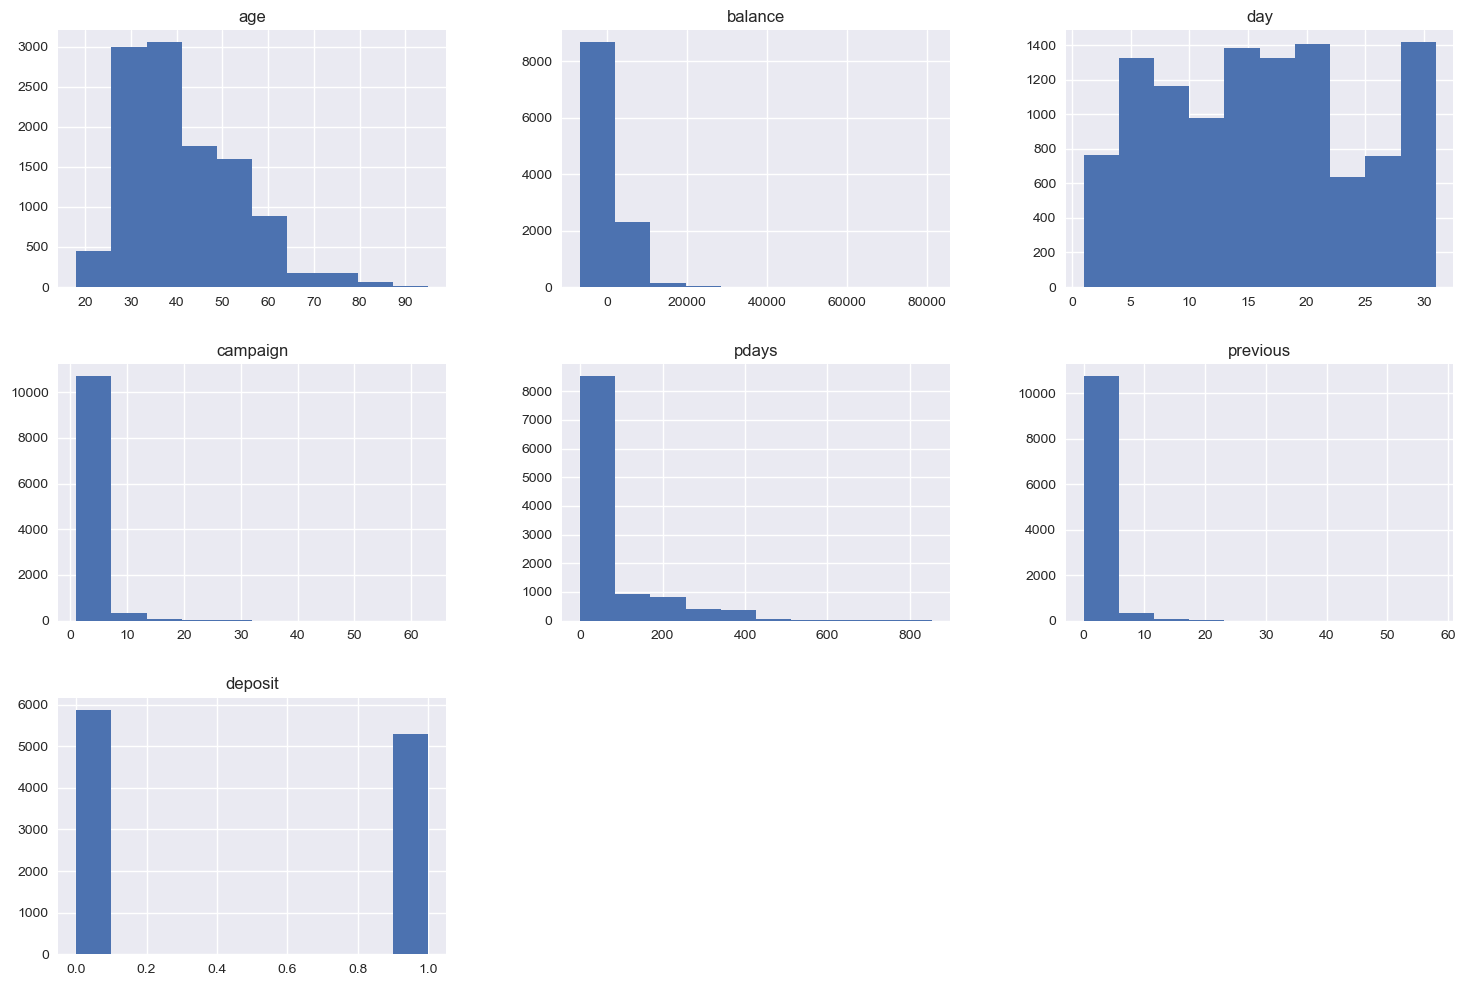

In [8]:
df_bank.hist(figsize=(18,12))
plt.show()

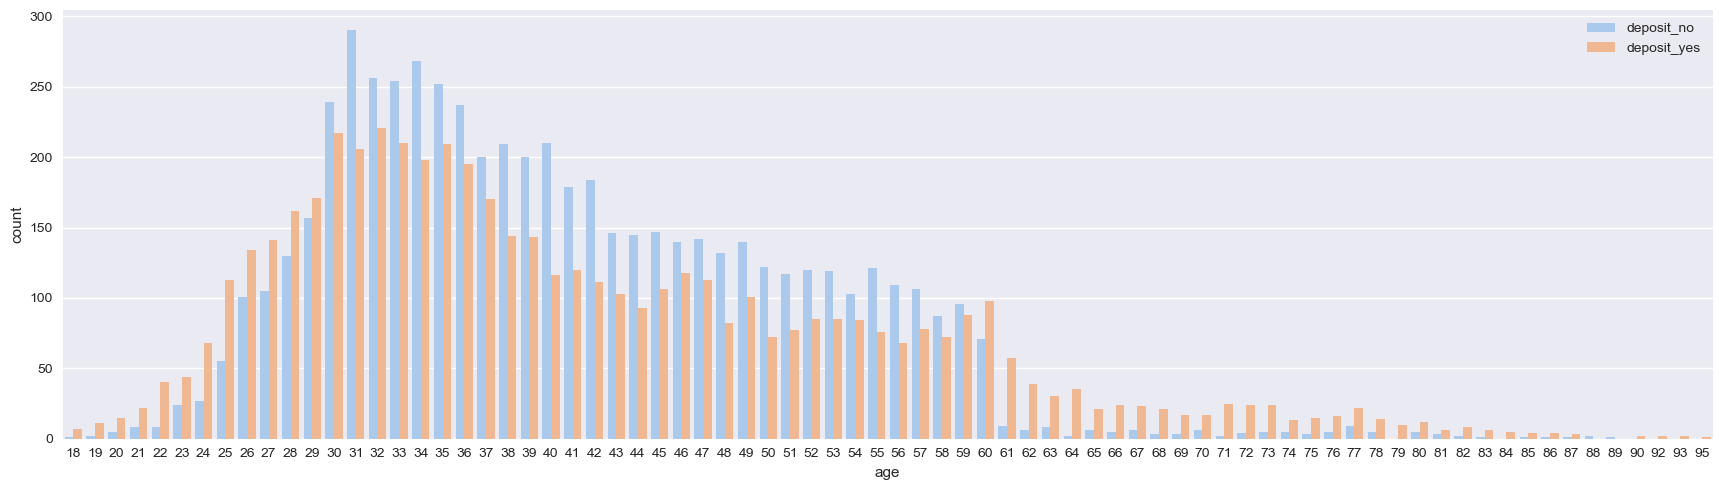

In [9]:
# La visualisation de l'âge des deposit 
ax = sns.catplot(x="age", kind="count",hue="deposit",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)
plt.legend(loc='upper right', labels= ["deposit_no", "deposit_yes"])
plt.show()

In [10]:
df_bank[df_bank.deposit==1].balance.mean()

1804.2679145396105

In [11]:
# Description des données
df_bank.describe()

,age,balance,day,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

#step in machine learning pipelines to standardize numerical data before feeding it into a model.
scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])


df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,1
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,1
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,1
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,1
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,-0.186785,-0.481184,-0.36326,unknown,1


## Encode Categorical Value

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use `OneHotEncoder()` provided by sklearn. Basically it will transform a categorical column from this:

| marital | housing |
|----------|---------|
| single   | yes     |
| divorced | no      |
| married  | no      |

...into 


| marital_single | marital_divorced | marital_married | housing_yes | housing_no |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head()

Shape of dataframe: (11162, 51)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,0


In [14]:

df_tempp=df_bank_ready.copy()
df_tempp["deposit"]=df_bank["deposit"]
df_tempp

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.363260,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.363260,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.363260,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.363260,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.363260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.691015,-0.473616,0.515650,-0.554168,-0.481184,-0.363260,0
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.187357,-0.246658,0.040612,0.547981,-0.481184,-0.363260,0
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.774958,-0.464934,0.396891,-0.186785,-0.481184,-0.363260,0
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.148416,-0.473926,-0.909466,-0.186785,1.109571,1.818332,0


## Split Dataset for Training and Testing

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 80:20 for training and testing respectively. This will result in our training data having 8929 rows and 2233 rows for the testing data.

In [15]:
# Select Features
feature = df_tempp.drop('deposit', axis=1)

# Select Target
target = df_tempp['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


In [16]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Modelling

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.

where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who **actually** wanted to make a deposit can mean a lose opportunity/revenue.

Below we will define a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.


## Selection des variables pour le modele
##### RFE

In [17]:
x = df_tempp.drop(['deposit'], axis = 1)
y = df_tempp.loc[:,"deposit"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [18]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(x_train, y_train)



C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [19]:
selected_mask = rfe.get_support()
selected_feature_names = x.columns[selected_mask].tolist()
print(selected_feature_names)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

['month_dec', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']
Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False  True
 False False  True  True False False  True False False False False False
 False False]
Feature Ranking: [39 46 27 19 28 12 34 36  3 35 26 18 37 16 33 31 44 25 38 20 32  9 21 10
 22 17 24  2 30  7  1 11  4  6 43  1  8  5  1  1 14 15  1 13 45 29 42 23
 41 40]


## Kbest 

In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load example data
X = df_tempp.drop('deposit', axis=1)
y = df_tempp['deposit']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Extract the names of the selected features
selected_mask = selector.get_support()
selected_feature_names = X.columns[selected_mask].tolist()

print(selected_feature_names)

['housing_no', 'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']


## Correlation 

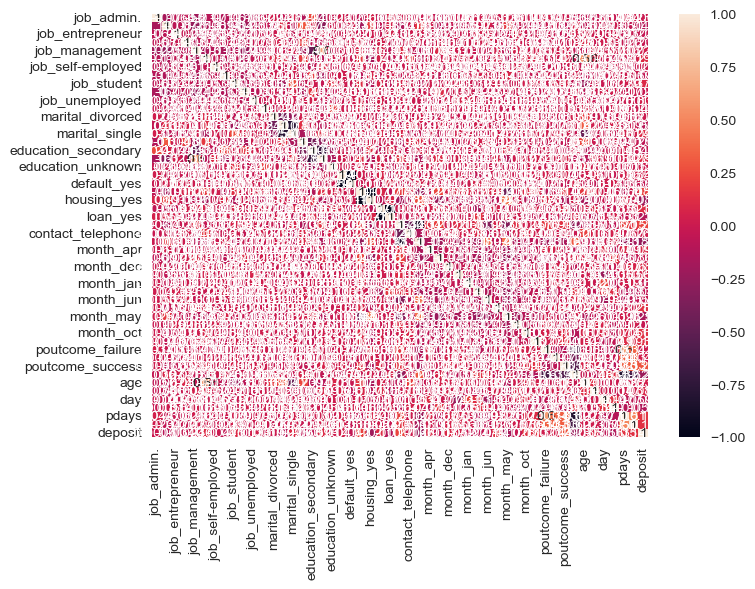

In [21]:
### carte de corrélation
sns.heatmap(df_tempp.corr(),annot=True)
plt.show()

ainsi On va selectionner les variables : balance day campaign pdays previous

### Application de modele

## Regression logistique

In [94]:
x_train_selected=x_train[['housing_no', 'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']]
x_test_selected=x_test[['housing_no', 'contact_cellular', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']]

lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train_selected, y_train)

LogisticRegression(max_iter=1000)

In [96]:
reg_eval = evaluate_model(lr, x_test, y_test)

# Print result
print('Accuracy:', reg_eval['acc'])
print('Precision:', reg_eval['prec'])
print('Recall:', reg_eval['rec'])
print('F1 Score:', reg_eval['f1'])
print('Cohens Kappa Score:', reg_eval['kappa'])
print('Area Under Curve:', reg_eval['auc'])
print('Confusion Matrix:\n', reg_eval['cm'])

Accuracy: 0.6506941334527542
Precision: 0.6518298714144412
Recall: 0.6062557497700092
F1 Score: 0.6282173498570066
Cohens Kappa Score: 0.29963971498882147
Area Under Curve: 0.7071326047481661
Confusion Matrix:
 [[794 352]
 [428 659]]


## PREDICTION 

In [28]:

y_pred = lr.predict(x_test_selected)
cnf_matrix=confusion_matrix(y_pred,y_test)
cnf_matrix

array([[794, 428],
       [352, 659]], dtype=int64)

Text(0.5, 489.55555555555554, 'Predicted Label')

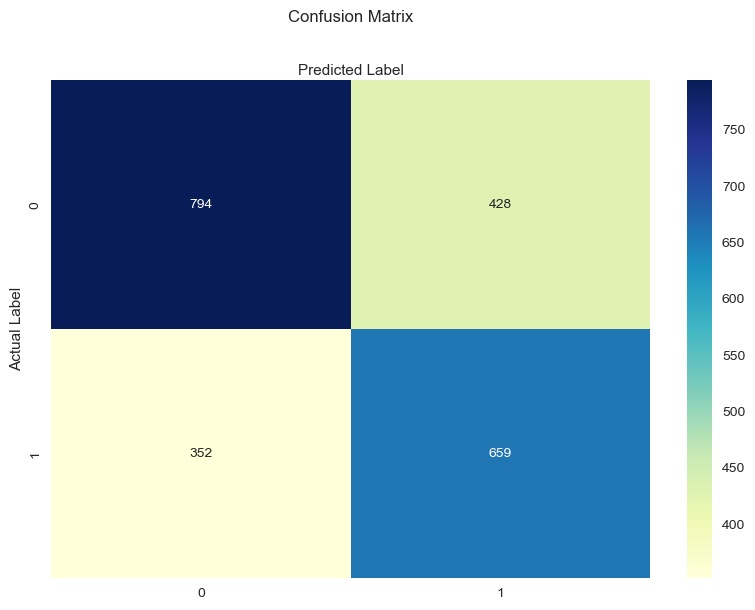

In [29]:
#plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1146
           1       0.65      0.61      0.63      1087

    accuracy                           0.65      2233
   macro avg       0.65      0.65      0.65      2233
weighted avg       0.65      0.65      0.65      2233



La précision pour la classe 0 (non) est de 0,65, ce qui signifie que sur toutes les instances que le modèle a prédites comme "non", 65% d'entre elles étaient en fait "non". La précision pour la classe 1 (oui) est également de 0,65, ce qui signifie que sur toutes les instances que le modèle a prédites comme "oui", 65% d'entre elles étaient en fait "oui".

Le rappel pour la classe 0 est de 0,69, ce qui signifie que sur toutes les instances "non" réelles, le modèle a correctement identifié 69% d'entre elles comme "non". Le rappel pour la classe 1 est de 0,61, ce qui signifie que sur toutes les instances "oui" réelles, le modèle a correctement identifié 61% d'entre elles comme "oui".

In [31]:
#use model to predict probability that given y value is 1
y_pred_proba = lr.predict_proba(x_test_selected)[::,1]

#calculate AUC of model
auc = roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.7071326047481661


 L'aire sous la courbe ROC (Receiver Operating Characteristic) est un métrique couramment utilisée pour évaluer la performance d'un modèle de classification binaire.

Une valeur AUC de 0,7 signifie que le modèle a une performance modérée en termes de séparation des classes positives et négatives. Plus la valeur de l'AUC se rapproche de 1, 

## AIC ET BIC 


In [32]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
 
# number of parameters
num_params = len(lr.coef_) + 1
print('Number of parameters: %d' % (num_params))
# calculate the error
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 2
MSE: 0.349
AIC: -11736.273


In [33]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

BIC: -11721.633


In [34]:
log_reg = smf.logit("deposit ~ housing_no + contact_cellular + contact_unknown + poutcome_success + poutcome_unknown ",data=df_tempp).fit()



Optimization terminated successfully.
         Current function value: 0.611461
         Iterations 6


# resume du modele 

In [35]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11156
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.1161
Time:                        22:28:35   Log-Likelihood:                -6825.1
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3384      0.091     -3.726      0.000      -0.516      -0.160
housing_no           0.5948      0.042     14.034      0.000       0.512       0.678
contact_cellular     0.2008 

# AIC ET BIC

In [36]:
print(log_reg.aic)
print(log_reg.bic)

13662.259865615662
13706.181488203752


# accuracy test 

In [37]:
# performing predictions on the test dataset
yhat = log_reg.predict(x_test_selected)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(y_test, prediction)  
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.6506941334527542


# Wald test 

In [38]:
wald_test = log_reg.wald_test_terms(scalar=True)
print(wald_test)

                        chi2        P>chi2  df constraint
Intercept          13.883609  1.944873e-04              1
housing_no        196.944732  9.695826e-45              1
contact_cellular    6.382052  1.152801e-02              1
contact_unknown    72.233482  1.911843e-17              1
poutcome_success  311.343243  1.113295e-69              1
poutcome_unknown   29.563680  5.410941e-08              1


la valeur P_value est inférieure à un seuil de significatio 0.05 , cela suggère qu'il existe une association significative entre la variable réponse et les variables prédictives. 

# decision tree



In [39]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6332288401253918
Precision: 0.6268939393939394
Recall: 0.609015639374425
F1 Score: 0.6178254783014466
Cohens Kappa Score: 0.2654059427813984
Area Under Curve: 0.632605550926305
Confusion Matrix:
 [[752 394]
 [425 662]]


importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [42]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(x_train)
    ytest_predict = model.predict(x_test)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(x_train,y_train),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(x_test,y_test))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          recall_score(y_train,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          recall_score(y_test,ytest_predict))
    make_confusion_matrix(y_train,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.6283027317510076
 Recall   : Train : 1.0  Test: 0.5924563017479301


C:\Users\MSI\AppData\Local\Temp\ipykernel_27340\2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


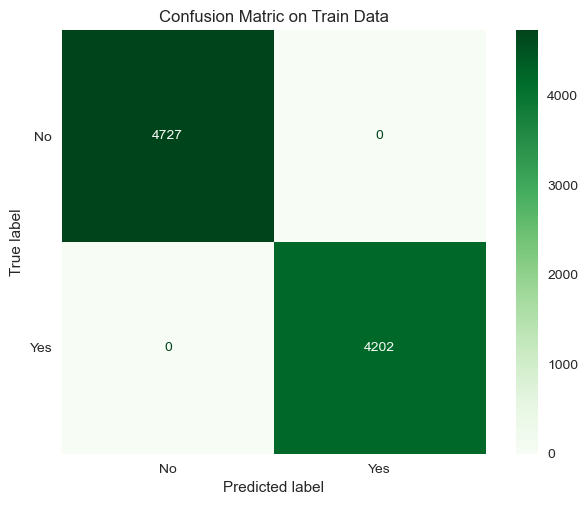

C:\Users\MSI\AppData\Local\Temp\ipykernel_27340\2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


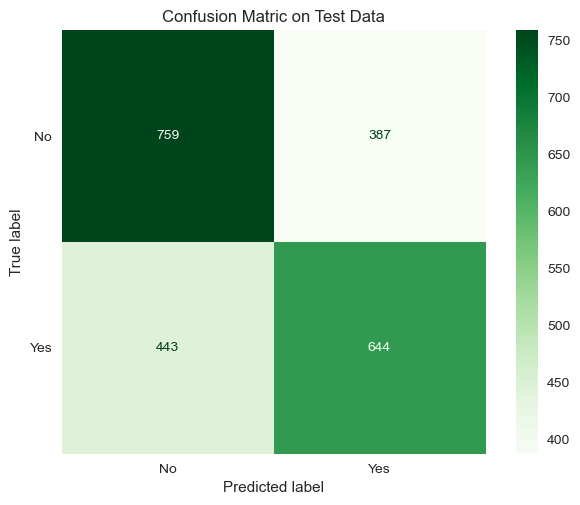

In [43]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(x_train, y_train)
get_recall_score(model)

In [44]:
column_names = list(x.columns)
feature_names = column_names
plt.figure(figsize=(20,30))

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

In [45]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [46]:
x_train_selected=x_train[['balance', 'day', 'age', 'campaign','contact_unknown']]
x_test_selected=x_test[['balance', 'day', 'age', 'campaign','contact_unknown']]
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train_selected, y_train)

DecisionTreeClassifier(random_state=0)

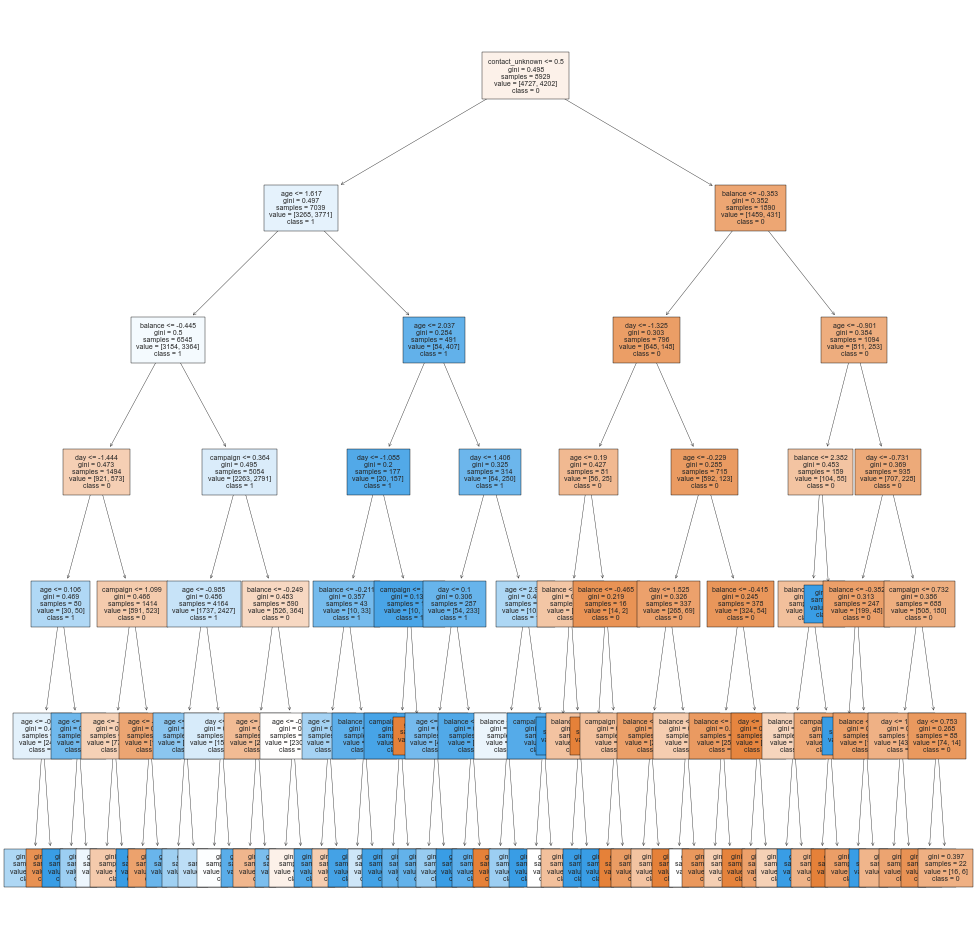

In [47]:

# Create the decision tree classifier object
dtc = tree.DecisionTreeClassifier(random_state=0 , max_depth=6)

# Train the decision tree classifier on the training set
dtc.fit(x_train_selected, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 12))
tree.plot_tree(dtc, feature_names=['balance', 'day', 'age', 'campaign','contact_unknown'], filled=True, fontsize=5, class_names=['0', '1'])
plt.show()

In [48]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,max_depth=9)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,6), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train_selected, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=5, random_state=1)

In [99]:
# Fit the best algorithm to the data. 
estimator.fit(x_train_selected, y_train)
ytrain_predict=estimator.predict(x_train_selected)
ytest_predict=estimator.predict(x_test_selected)

In [100]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Best model

In [52]:
best_model = DecisionTreeClassifier(ccp_alpha=0.019,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(x_train_selected, y_train)

DecisionTreeClassifier(ccp_alpha=0.019, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [53]:
dtB_eval = evaluate_model(best_model, x_test_selected, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6332288401253918
Precision: 0.6268939393939394
Recall: 0.609015639374425
F1 Score: 0.6178254783014466
Cohens Kappa Score: 0.2654059427813984
Area Under Curve: 0.632605550926305
Confusion Matrix:
 [[752 394]
 [425 662]]


# Random forest 


In [54]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_pred=rf.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rf.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
cnfu_matrix=confusion_matrix(y_test,y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1146
           1       0.74      0.64      0.69      1087

    accuracy                           0.72      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.72      0.71      2233

Confusion Matrix:
 [[902 244]
 [390 697]]
Training Score:
 100.0
Mean Squared Error:
 0.283922973578146
R2 score is:
 -0.13648529102465923


Text(0.5, 489.55555555555554, 'Predicted Label')

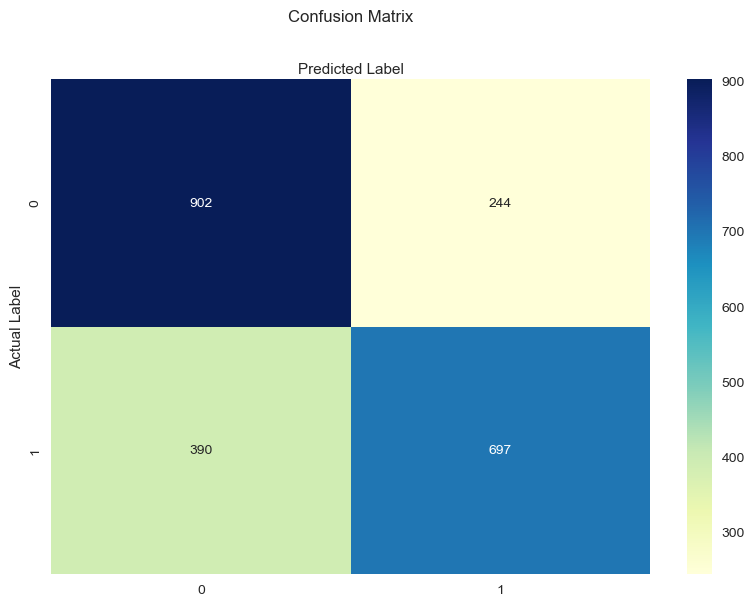

In [56]:
#plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnfu_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [57]:
print(accuracy_score(y_test,y_pred))

0.716077026421854


In [58]:

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [59]:
rf_eval = evaluate_model(rf, x_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.716077026421854
Precision: 0.740701381509033
Recall: 0.641214351425943
F1 Score: 0.6873767258382643
Cohens Kappa Score: 0.4297858457622271
Area Under Curve: 0.7746238667032725
Confusion Matrix:
 [[902 244]
 [390 697]]


# model comparaison 

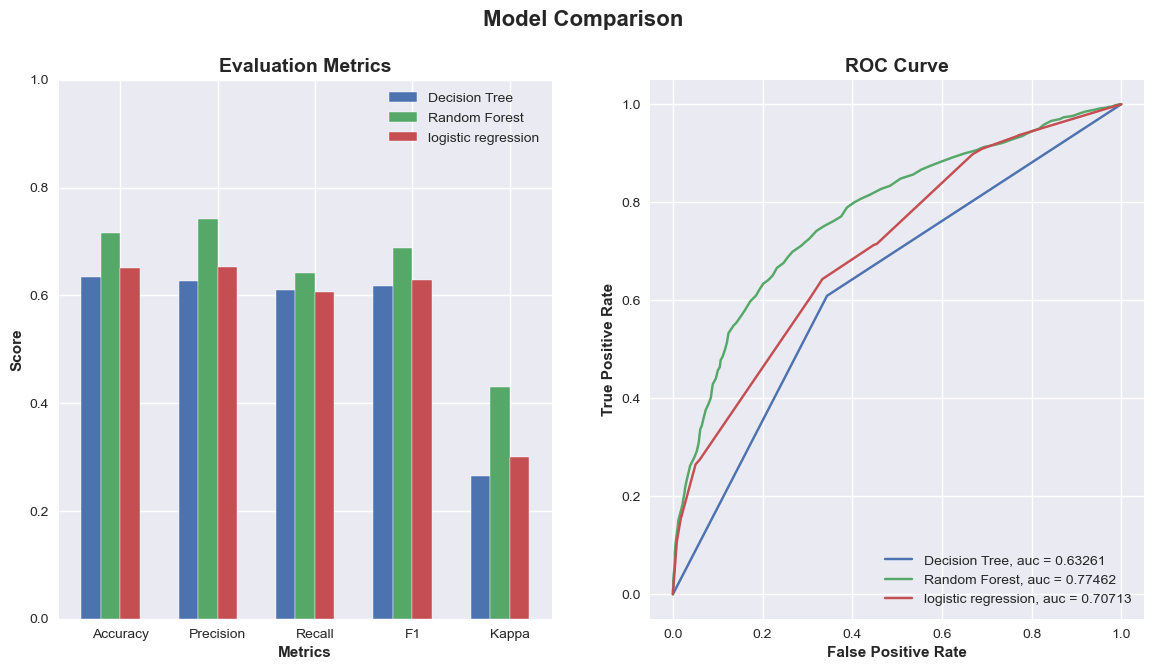

In [97]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [reg_eval['acc'], reg_eval['prec'], reg_eval['rec'], reg_eval['f1'], reg_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='logistic regression')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(reg_eval['fpr'], reg_eval['tpr'], label='logistic regression, auc = {:0.5f}'.format(reg_eval['auc']))


## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

On remarque bien que le score calculée de la methode random forest est meilleur que les deux autres methodes pour les 6 metriques 
de plus que la courbe roc est au dessus des autres presentant une meilleure auc 

### KNN

In [70]:

# Create a k-NN classifier with k=3 (you can change the value of k)
k = 2

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
KNN_eval = evaluate_model(knn_classifier, x_test, y_test)

# Print result
print('Accuracy:', KNN_eval['acc'])
print('Precision:', KNN_eval['prec'])
print('Recall:', KNN_eval['rec'])
print('F1 Score:', KNN_eval['f1'])
print('Cohens Kappa Score:', KNN_eval['kappa'])
print('Area Under Curve:', KNN_eval['auc'])
print('Confusion Matrix:\n', KNN_eval['cm'])

### SVM

In [73]:

from sklearn.svm import SVC
svc_classifier = SVC(probability=True,kernel='linear', C=1.0)  
svc_classifier.fit(x_train, y_train)
y_pred = svc_classifier.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.65


In [75]:
param_grid = {
    'C': [0.1,10],             
    'kernel': ['linear', 'rbf'],  
    'gamma': [0.1,10]         
}
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 10],
                         'kernel': ['linear', 'rbf']})

In [76]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_accuracy = grid_search.best_score_
print("Best Cross-Validated Accuracy:", best_accuracy)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.7132959432373174
Test Accuracy: 0.7071204657411554


### ADABOOST

In [77]:
weak_learner = RandomForestClassifier(random_state=0)

ada_classifier = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=50, learning_rate=1.0, random_state=42)
model1=ada_classifier.fit(x_train, y_train)
y_pred = ada_classifier.predict(x_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [79]:
weighted_sum_predictions = ada_classifier.decision_function(x_train)
print("Weighted Sum Predictions:")
print(weighted_sum_predictions)

Weighted Sum Predictions:
[ 2.66911233 -0.94663321  1.18213933 ...  2.14398284  1.86351561
  2.96479457]


In [80]:
y_pred = ada_classifier.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)

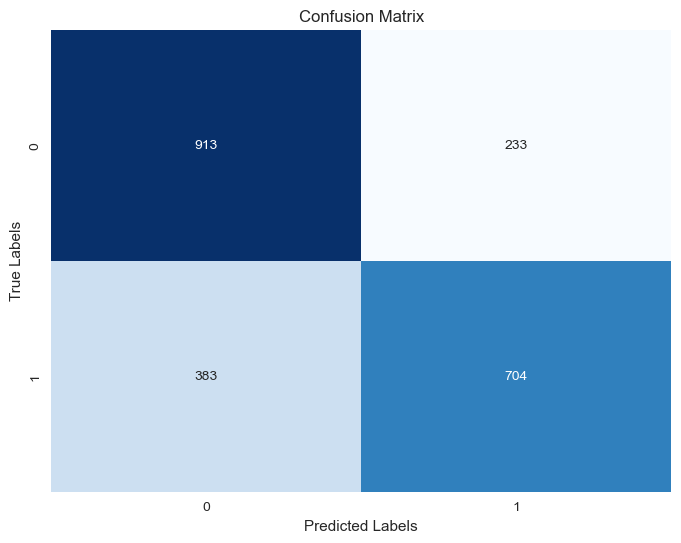

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [85]:

abc =AdaBoostClassifier(n_estimators=10,learning_rate=1, random_state=0)
model2 = abc.fit(x_train, y_train)

y_pred = model2.predict(x_test)

print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.677115987460815


### XGBOOST


In [86]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Maximum depth of each tree
    random_state=42
)

In [87]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77      1146
           1       0.81      0.60      0.69      1087

    accuracy                           0.73      2233
   macro avg       0.75      0.73      0.73      2233
weighted avg       0.75      0.73      0.73      2233

